# Assignment 1: ML workflow with scikit-learn
## Ioannis Borektsioglou
### ib16118

All the question of the assignment have been answered below and have been supported with figures

In [1]:
# Import all necessary packages
import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cross_validation import StratifiedKFold
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata("MNIST original")

%matplotlib inline
plt.style.use("fivethirtyeight")

In [2]:
# Load and reformat the data
data = pd.DataFrame(mnist.data)
data["label"] = mnist.target

In [3]:
# Pick selected digits from the dataset; random sample 500 instances
# for each selected digit
def pick_digits(l, d, random_sample=500, seed=42):
    digits = []
    for i in l:
        digit = d[d.label == i]
        digits.append(digit.sample(random_sample, random_state=seed))
    return pd.concat(digits)

# Compute selected features
def pick_features(l, d):
    df = d.copy()
    df.drop("label", axis=1, inplace=True)
    
    features = pd.DataFrame(d["label"])
    for i in l:
        features[i] = np.nan
    
    for index, row in df.iterrows():
        if "f1" in l:
            sum = 0
            for ii, i in row.iteritems():
                image_row = math.floor(ii/28.0)
                if 1 < image_row and image_row < 8:
                    sum += i
            features["f1"][index] = sum
        if "f2" in l:
            sum = 0
            for ii, i in row.iteritems():
                image_row = math.floor(ii/28.0)
                if 10 < image_row and image_row < 17:
                    sum += i
            features["f2"][index] = sum
        if "f3" in l:
            sum = 0
            for ii, i in row.iteritems():
                image_row = math.floor(ii/28.0)
                if 19 < image_row and image_row < 26:
                    sum += i
            features["f3"][index] = sum

        if "f4" in l:
            sum = 0
            for ii, i in row.iteritems():
                image_col = ii%28
                if 1 < image_col and image_col < 8:
                    sum += i
            features["f4"][index] = sum
        if "f5" in l:
            sum = 0
            for ii, i in row.iteritems():
                image_col = ii%28
                if 10 < image_col and image_col < 17:
                    sum += i
            features["f5"][index] = sum
        if "f6" in l:
            sum = 0
            for ii, i in row.iteritems():
                image_col = ii%28
                if 19 < image_col and image_col < 26:
                    sum += i
            features["f6"][index] = sum

        if "f7" in l:
            sum = 0
            for i in range(1, 28):
                j = i - 1
                ind = j * 28 + i
                sum += row[ind]
            for i in range(0, 28):
                j = i
                ind = j * 28 + i
                sum += row[ind]
            for i in range(0, 27):
                j = i + 1
                ind = j * 28 + i
                sum += row[ind]
            features["f7"][index] = sum
        if "f8" in l:
            sum = 0
            for i in range(1, 28):
                j = i - 1
                i = 27 - i
                ind = j * 28 + i
                sum += row[ind]
            for i in range(0, 28):
                j = i
                i = 27 - i
                ind = j * 28 + i
                sum += row[ind]
            for i in range(0, 27):
                j = i + 1
                i = 27 - i
                ind = j * 28 + i
                sum += row[ind]
            features["f8"][index] = sum

        if "f9" in l:
            sum = 0
            for ii, i in row.iteritems():
                image_row = math.floor(ii/28.0)
                image_col = ii%28
                if 10 < image_row and image_row < 17 and 10 < image_col and image_col < 17:
                    sum += i
            features["f9"][index] = sum

    return features

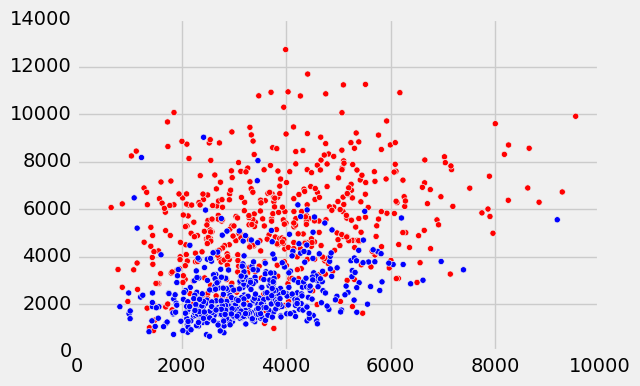

In [4]:
#get data
x = pick_digits([2,7], data)
y = pick_features(["f7", "f8"], x)

# Get labels
labels = y["label"]
# Get values
labels = labels.values

colourmap = []
for i in y["label"].values:
    if i == 2.0:
        colourmap.append("red")
    else:
        colourmap.append("blue")
        
# Plot the points
plt.scatter(y["f7"], y["f8"], c=colourmap)

## Motivation
From the above figure we can see that the blue points have low values of y and the red points have high values of y.Therefore the points of the two clases seem to be separated. So we can find a line which can classify the points with a high level of accuracy. In the case of support vector machines, a data point is viewed as a `f`-dimensional vector, where `f` is the number of features, and we want to know whether we can separate such points with a `(p-1)`-dimensional hyperplane. This is called a linear classifier. In our case we have two-dimensional points and we want a 1-dimensional hyperplane which is the line.

In addition we can see that we have some red points inside the bunch of the blue points and vice versa. In that case we need a more clever classifier which is nearest neighbour. In k-NN classification, the output is a class membership. An object is classified by a majority vote of its neighbors or by the distance from its neighbours, with the object being assigned to the class most common among its k nearest neighbors.(k is a positive integer, typically small)

## Support Vector Machine
Support Vector Mchine aka SVM needs to find a hyperplane of 1 dimension lower than the points such that the distance of its nearest data point is maximised. This is called linear classifier and if we set the kernel to `linear` the outcome will be the ordinary least squares

The output of this algorithm is the specific accuracy of each fold and the average accuracy using 10-fold cross validation and a plot with all the points and the decision boundary
### This algorithm takes too much time, so please do not run it many times.

Accuracy per fold: [0.81999999999999995, 0.81000000000000005, 0.85999999999999999, 0.87, 0.81999999999999995, 0.83999999999999997, 0.84999999999999998, 0.85999999999999999, 0.82999999999999996, 0.79000000000000004]
Average accuracy: 0.835


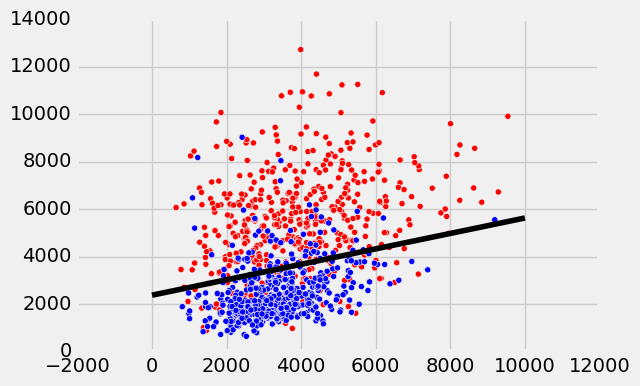

In [5]:

# Do Stratified 10-folds CV
k = 10
skf = StratifiedKFold(labels, n_folds=k)

SVM_acc_per_fold = []
clf = SVC(kernel="linear")

for train_index, test_index in skf:
    
    clf = clf.fit(y[["f7", "f8"]].loc[y.index[train_index]],
                  y["label"].loc[y.index[train_index]])

    predicted = clf.predict(y[["f7", "f8"]].loc[y.index[test_index]])
    
    # Compare predicted values with ground truth (accuracy)
    SVM_acc_per_fold.append( accuracy_score(y["label"].loc[y.index[test_index]], predicted) )

# To visualise the data
colourmap = []
for i in y["label"].values:
    if i == 2.0:
        colourmap.append("red")
    else:
        colourmap.append("blue")
        
# Plot the points
plt.scatter(y["f7"], y["f8"], c=colourmap)

# Plot the decision boundary
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(0, 10000)
yy = a * xx - (clf.intercept_[0]) / w[1]
plt.plot(xx, yy, "k-")

SVMmean_acc = np.mean(SVM_acc_per_fold)

print "Accuracy per fold:", SVM_acc_per_fold
print "Average accuracy:", SVMmean_acc



## K-Nearest Neighbours Classification
Neighbors-based classification is a type of instance-based learning and it simply stores instances of the training data. There are two ways of classification. The first one is with a simply vote of the nearest neighbours of each point. The second one which i have implemented is based on the distance of each points. This is defined by the variable `distance`. The optimal `k` is higly data-dependent and is specified by the user. If we choose a high value of k, we wil tend to overfit our data but if we choose a small amount it would not be very represantive and it would cost a low average accuracy

### References

`http://scikit-learn.org/stable/modules/neighbors.html`

`http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py`

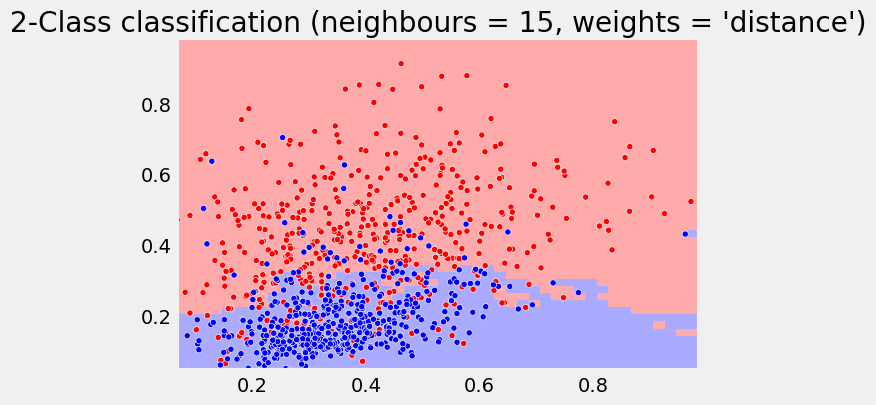

Accuracy per fold: [0.80000000000000004, 0.79000000000000004, 0.84999999999999998, 0.84999999999999998, 0.81999999999999995, 0.81000000000000005, 0.81999999999999995, 0.84999999999999998, 0.81999999999999995, 0.77000000000000002]
Average accuracy: 0.818


In [6]:
# Create colour maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

n_neighbors = 15

# Do Stratified 10-folds CV
k = 10
skf = StratifiedKFold(labels, n_folds=k)

acc_per_fold = []

h = 0.02

    
    
# we create an instance of Neighbours Classifier and fit the data.
clf = KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(y[["f7", "f8"]], y["label"])

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = y["f7"].min() - 1, y["f7"].max() + 1
y_min, y_max = y["f8"].min() - 1, y["f8"].max() + 1

# do a normalisation because of memory
xx, yy = np.meshgrid(np.arange(x_min/x_max, x_max/x_max, h),
                     np.arange(y_min/y_max, y_max/y_max, h))

nn_predict = clf.predict(np.c_[(xx*x_max).ravel(), (yy*y_max).ravel()])
    
#     Put the result into a color plot
nn_predict = nn_predict.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, nn_predict, cmap=cmap_light)
# Plot also the training points
plt.scatter(y["f7"]/x_max, y["f8"]/y_max, c=y["label"], cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("2-Class classification (neighbours = %i, weights = 'distance')"
          % (n_neighbors))
plt.show()

for train_index, test_index in skf:

    # we create an instance of Neighbours Classifier and fit the data.
    clf = KNeighborsClassifier(n_neighbors, weights='distance')
    clf.fit(y[["f7", "f8"]].loc[y.index[train_index]], y["label"].loc[y.index[train_index]])


    Z = clf.predict(y[["f7", "f8"]].loc[y.index[test_index]])


# Compare predicted values with ground truth (accuracy)
    acc_per_fold.append( accuracy_score(y["label"].loc[y.index[test_index]], Z) )

nnMean_acc = np.mean(acc_per_fold)
    
print "Accuracy per fold:", acc_per_fold
print "Average accuracy:", nnMean_acc

## Baseline

DummyClassifier is a classifier that makes predictions using simple rules. This classifier is useful as a simple baseline to compare with other (real) classifiers. It is called with strategy `stratified` which generates random predictions by respecting the training set class distribution

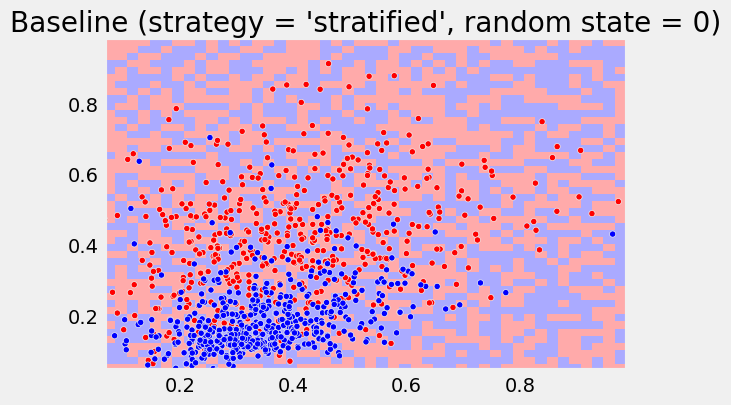

Accuracy per fold: [0.60999999999999999, 0.60999999999999999, 0.60999999999999999, 0.60999999999999999, 0.60999999999999999, 0.60999999999999999, 0.60999999999999999, 0.60999999999999999, 0.60999999999999999, 0.60999999999999999]
Average accuracy: 0.61


In [7]:

# Create colour maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Do Stratified 10-folds CV
k = 10
skf = StratifiedKFold(labels, n_folds=k)

baseline_acc_per_fold = []
clf = DummyClassifier(strategy='stratified',random_state=0)

for train_index, test_index in skf:
    
    clf = clf.fit(y[["f7", "f8"]].loc[y.index[train_index]],
                  y["label"].loc[y.index[train_index]])

    predicted = clf.predict(y[["f7", "f8"]].loc[y.index[test_index]])
    
    # Compare predicted values with ground truth (accuracy)
    baseline_acc_per_fold.append( accuracy_score(y["label"].loc[y.index[test_index]], predicted) )

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = y["f7"].min() - 1, y["f7"].max() + 1
y_min, y_max = y["f8"].min() - 1, y["f8"].max() + 1
xx, yy = np.meshgrid(np.arange(x_min/x_max, x_max/x_max, h),
                     np.arange(y_min/y_max, y_max/y_max, h))

predicted = clf.predict(np.c_[(xx*x_max).ravel(), (yy*y_max).ravel()])
    
#     Put the result into a color plot
predicted = predicted.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, predicted, cmap=cmap_light)
# Plot also the training points
plt.scatter(y["f7"]/x_max, y["f8"]/y_max, c=y["label"], cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Baseline (strategy = 'stratified', random state = 0)")
plt.show()

baseline_mean_acc = np.mean(baseline_acc_per_fold)

print "Accuracy per fold:", baseline_acc_per_fold
print "Average accuracy:", baseline_mean_acc

### Comparison
In the figures below we can see a comparison of the classifiers to each other and to baseline. First of all, using 10-fold cross validation for our classifiers, we can see a higher level of accuracy at SVM and NN comparing to baseline and we can see that SVM gives us better average accuracy instead of NN, because of the structure of our data which was described above. Aditionally, the real classifiers give more uniform classification comparing to baseline which gives more random classification

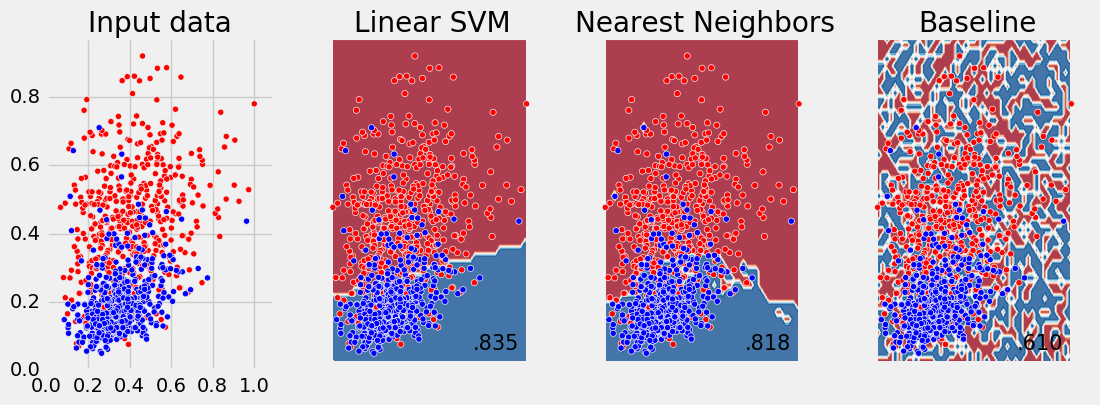

In [8]:
h = 0.02
names = ["Linear SVM", "Nearest Neighbors", "Baseline"]

classifiers = [
    SVC(kernel="linear"),
    KNeighborsClassifier(15, 'distance'),
    DummyClassifier(strategy='stratified',random_state=0)
    ]
accuracy = [SVMmean_acc, nnMean_acc, baseline_mean_acc]

figure = plt.figure(figsize=(12, 4))
x_min, x_max = y["f7"].min() - .5, y["f7"].max() + .5
y_min, y_max = y["f8"].min() - .5, y["f8"].max() + .5
xx, yy = np.meshgrid(np.arange(x_min/x_max, x_max/x_max, h),
                     np.arange(y_min/y_max, y_max/y_max, h))
xx += 0.005
yy -= 0.02
# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
i = 1
plt.subplot(1, len(classifiers) + 1, i)
# if ds_cnt == 0:
plt.title("Input data")
# Plot the training points
plt.xlim(0, xx.max() + 0.1)
plt.ylim(0, yy.max())

plt.scatter(y["f7"]/x_max, y["f8"]/y_max, c=y["label"], cmap=cm_bright)

i+=1
# iterate over classifiers
for name, clf, score in zip(names, classifiers, accuracy):
    plt.subplot(1, len(classifiers) + 1, i)
    clf.fit(y[["f7", "f8"]], y["label"])

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].

    Z = clf.predict(np.c_[(xx*x_max).ravel(), (yy*y_max).ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    

    plt.xlim(0, xx.max()+0.1)
    plt.ylim(0, yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(name)
     # Plot also the training points
    plt.scatter(y["f7"]/x_max, y["f8"]/y_max, c=y["label"], cmap=cm_bright)
    plt.text(xx.max() - .03, yy.min() + .03, ('%.3f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
    i+=1
# plt.tight_layout()
plt.show()